In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [19]:
pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('train.csv')
train.shape

(1460, 81)

In [21]:
train.head()

,ID,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,ALLEY,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,MASVNRAREA,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTFINSF2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,2NDFLRSF,LOWQUALFINSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,FIREPLACEQU,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,ENCLOSEDPORCH,3SSNPORCH,SCREENPORCH,POOLAREA,POOLQC,FENCE,MISCFEATURE,MISCVAL,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
train.columns = [ col.upper() for col in train.columns]

In [10]:
train.columns

Index(['ID', 'MSSUBCLASS', 'MSZONING', 'LOTFRONTAGE', 'LOTAREA', 'STREET',
       'ALLEY', 'LOTSHAPE', 'LANDCONTOUR', 'UTILITIES', 'LOTCONFIG',
       'LANDSLOPE', 'NEIGHBORHOOD', 'CONDITION1', 'CONDITION2', 'BLDGTYPE',
       'HOUSESTYLE', 'OVERALLQUAL', 'OVERALLCOND', 'YEARBUILT', 'YEARREMODADD',
       'ROOFSTYLE', 'ROOFMATL', 'EXTERIOR1ST', 'EXTERIOR2ND', 'MASVNRTYPE',
       'MASVNRAREA', 'EXTERQUAL', 'EXTERCOND', 'FOUNDATION', 'BSMTQUAL',
       'BSMTCOND', 'BSMTEXPOSURE', 'BSMTFINTYPE1', 'BSMTFINSF1',
       'BSMTFINTYPE2', 'BSMTFINSF2', 'BSMTUNFSF', 'TOTALBSMTSF', 'HEATING',
       'HEATINGQC', 'CENTRALAIR', 'ELECTRICAL', '1STFLRSF', '2NDFLRSF',
       'LOWQUALFINSF', 'GRLIVAREA', 'BSMTFULLBATH', 'BSMTHALFBATH', 'FULLBATH',
       'HALFBATH', 'BEDROOMABVGR', 'KITCHENABVGR', 'KITCHENQUAL',
       'TOTRMSABVGRD', 'FUNCTIONAL', 'FIREPLACES', 'FIREPLACEQU', 'GARAGETYPE',
       'GARAGEYRBLT', 'GARAGEFINISH', 'GARAGECARS', 'GARAGEAREA', 'GARAGEQUAL',
       'GARAGECOND', 'PAVEDDRIVE

In [22]:
train.info(show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1460 non-null   int64  
 1   MSSUBCLASS     1460 non-null   int64  
 2   MSZONING       1460 non-null   object 
 3   LOTFRONTAGE    1201 non-null   float64
 4   LOTAREA        1460 non-null   int64  
 5   STREET         1460 non-null   object 
 6   ALLEY          91 non-null     object 
 7   LOTSHAPE       1460 non-null   object 
 8   LANDCONTOUR    1460 non-null   object 
 9   UTILITIES      1460 non-null   object 
 10  LOTCONFIG      1460 non-null   object 
 11  LANDSLOPE      1460 non-null   object 
 12  NEIGHBORHOOD   1460 non-null   object 
 13  CONDITION1     1460 non-null   object 
 14  CONDITION2     1460 non-null   object 
 15  BLDGTYPE       1460 non-null   object 
 16  HOUSESTYLE     1460 non-null   object 
 17  OVERALLQUAL    1460 non-null   int64  
 18  OVERALLC

In [23]:
train.drop(columns=['ID'], inplace=True)

In [29]:
columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss != 0]
columns_with_miss.sort_values(ascending=False)

POOLQC          1453
MISCFEATURE     1406
ALLEY           1369
FENCE           1179
FIREPLACEQU      690
LOTFRONTAGE      259
GARAGETYPE        81
GARAGEYRBLT       81
GARAGEFINISH      81
GARAGEQUAL        81
GARAGECOND        81
BSMTEXPOSURE      38
BSMTFINTYPE2      38
BSMTFINTYPE1      37
BSMTCOND          37
BSMTQUAL          37
MASVNRAREA         8
MASVNRTYPE         8
ELECTRICAL         1
dtype: int64

In [31]:
train.drop(columns=['POOLQC', 'MISCFEATURE', 'ALLEY', 'FENCE'], inplace=True)

In [34]:
train['FIREPLACEQU'].value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FIREPLACEQU, dtype: int64

In [37]:
train['FIREPLACEQU'].fillna(0, inplace=True)
train['FIREPLACEQU'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

In [38]:
train['FIREPLACEQU'].value_counts(dropna=False)

0    690
4    380
3    313
2     33
5     24
1     20
Name: FIREPLACEQU, dtype: int64

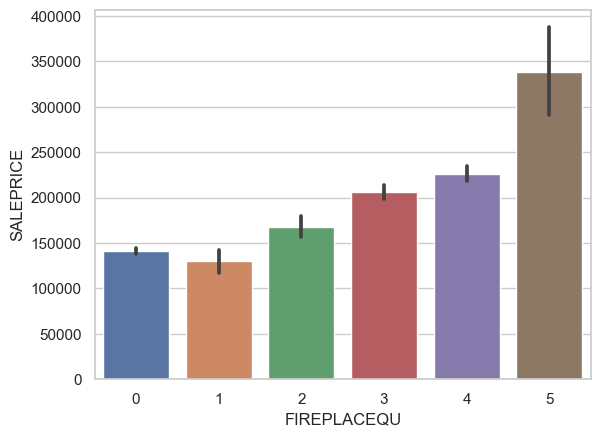

In [40]:
sns.set(style='whitegrid')
sns.barplot(x='FIREPLACEQU', y='SALEPRICE', data=train)
plt.show()

In [47]:
columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss != 0]
c = list(columns_with_miss.index)
c.append('SALEPRICE')
train[c].corr(numeric_only=True)

,LOTFRONTAGE,MASVNRAREA,GARAGEYRBLT,SALEPRICE
LOTFRONTAGE,1.000000,0.193458,0.070250,0.351799
MASVNRAREA,0.193458,1.000000,0.252691,0.477493
GARAGEYRBLT,0.070250,0.252691,1.000000,0.486362
SALEPRICE,0.351799,0.477493,0.486362,1.000000


In [51]:
cols_to_be_removed = train[c].corr(numeric_only=True).columns.to_list()

In [53]:
cols_to_be_removed.pop()

'SALEPRICE'

In [54]:
cols_to_be_removed


['LOTFRONTAGE', 'MASVNRAREA', 'GARAGEYRBLT']

In [55]:
train.drop(columns=cols_to_be_removed, inplace=True)

In [58]:

columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss != 0]
columns_with_miss.sort_values(ascending=False)

GARAGETYPE      81
GARAGEFINISH    81
GARAGEQUAL      81
GARAGECOND      81
BSMTEXPOSURE    38
BSMTFINTYPE2    38
BSMTQUAL        37
BSMTCOND        37
BSMTFINTYPE1    37
MASVNRTYPE       8
ELECTRICAL       1
dtype: int64

In [71]:
columns_with_miss.index.to_list()

['MASVNRTYPE',
 'BSMTQUAL',
 'BSMTCOND',
 'BSMTEXPOSURE',
 'BSMTFINTYPE1',
 'BSMTFINTYPE2',
 'ELECTRICAL',
 'GARAGETYPE',
 'GARAGEFINISH',
 'GARAGEQUAL',
 'GARAGECOND']

In [61]:
train.GARAGETYPE.fillna('NA', inplace=True)

In [63]:
train.GARAGETYPE.isna().sum()

0

In [72]:
for c in ['BSMTEXPOSURE', 'BSMTFINTYPE1', 'BSMTFINTYPE2', 'GARAGETYPE', 'GARAGEFINISH' ]:
    train[c].fillna('NA', inplace=True)

train['MASVNRTYPE'].fillna('None', inplace=True)


    

In [73]:
columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss != 0]
columns_with_miss.sort_values(ascending=False)

GARAGEQUAL    81
GARAGECOND    81
BSMTQUAL      37
BSMTCOND      37
ELECTRICAL     1
dtype: int64

In [75]:
train[train['ELECTRICAL'].isnull() == True ]

,MSSUBCLASS,MSZONING,LOTAREA,STREET,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTFINSF2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,2NDFLRSF,LOWQUALFINSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,FIREPLACEQU,GARAGETYPE,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,ENCLOSEDPORCH,3SSNPORCH,SCREENPORCH,POOLAREA,MISCVAL,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
1379,80,RL,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,0,BuiltIn,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,0,5,2008,WD,Normal,167500


In [78]:
train['ELECTRICAL'].fillna(method='ffill', inplace=True)

In [80]:
columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss != 0]
columns_with_miss.sort_values(ascending=False)

GARAGEQUAL    81
GARAGECOND    81
BSMTQUAL      37
BSMTCOND      37
dtype: int64

In [82]:
ord_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', \
'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
ord_cols = [c.upper() for c in ord_cols]

In [84]:
for col in ord_cols:
    train[col].fillna(0, inplace=True)
    train[col].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

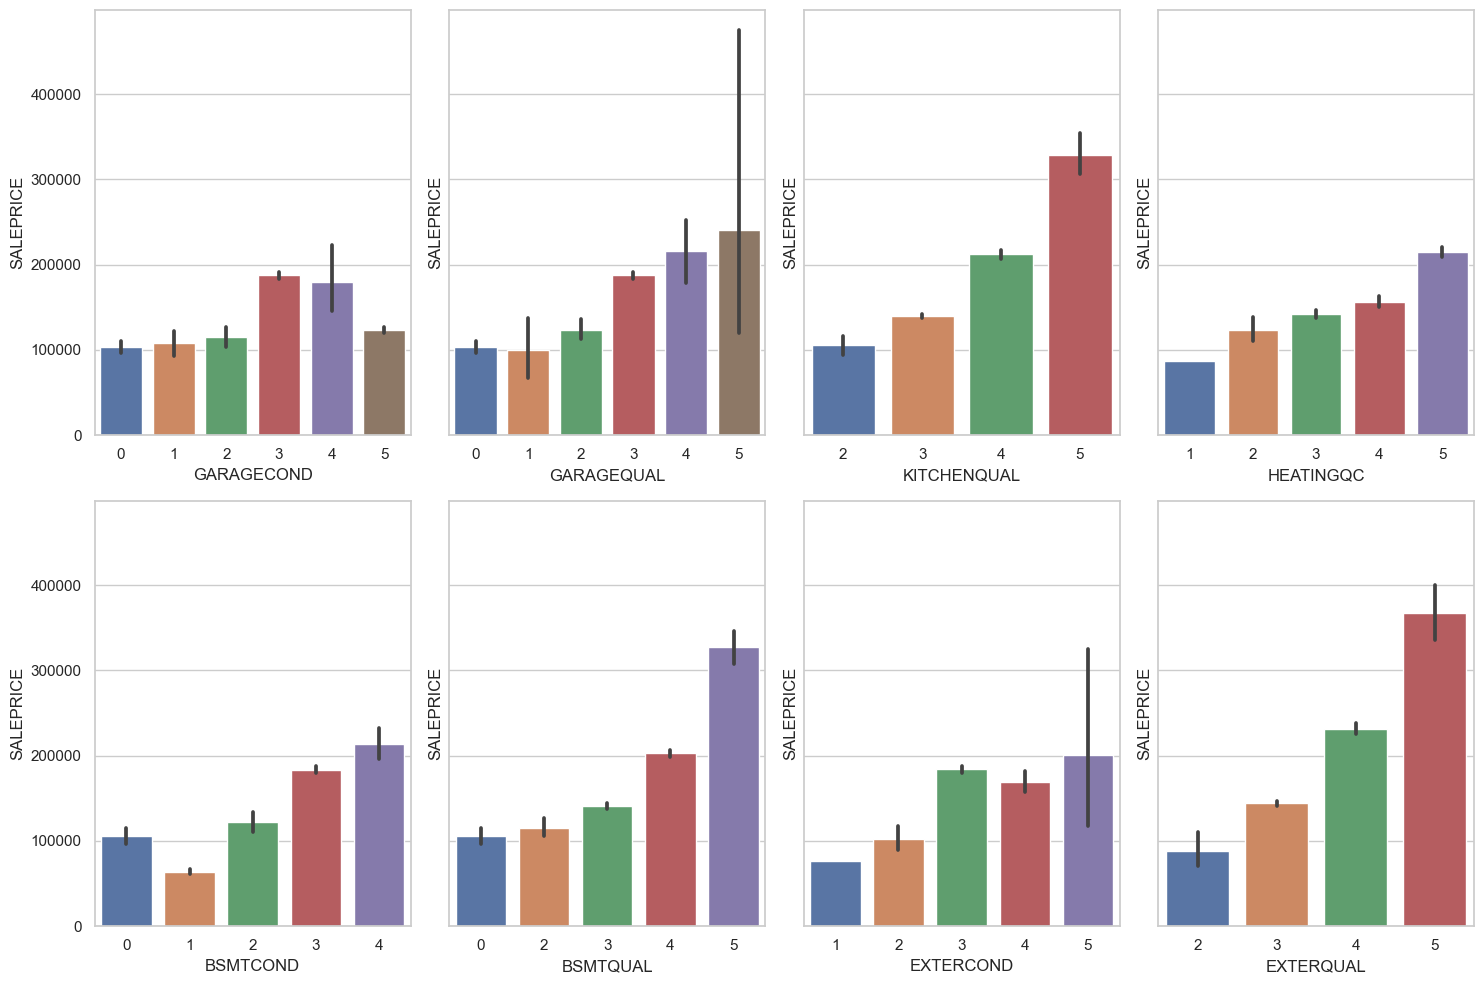

In [86]:
f, ax = plt.subplots(2, 4, figsize=(15, 10), sharey=True)

for r in range(0,2):
    for c in range(0, 4):
        sns.barplot(x=ord_cols.pop(), y="SALEPRICE",  data=train, ax=ax[r][c])
    
plt.tight_layout()
plt.show()



In [91]:
cols = train.columns
num_columns = train._get_numeric_data().columns
nom_columns = list(set(cols) - set(num_columns))

In [100]:
value_counts = {}
for c in nom_columns:
    value_counts[c] = len(train[c].value_counts())

sorted_value_counts = {k:v for k, v in sorted(value_counts.items(), key=lambda item:item[1])}
sorted_value_counts

{'UTILITIES': 2,
 'STREET': 2,
 'CENTRALAIR': 2,
 'LANDSLOPE': 3,
 'PAVEDDRIVE': 3,
 'LANDCONTOUR': 4,
 'LOTSHAPE': 4,
 'MASVNRTYPE': 4,
 'GARAGEFINISH': 4,
 'ELECTRICAL': 5,
 'BSMTEXPOSURE': 5,
 'BLDGTYPE': 5,
 'LOTCONFIG': 5,
 'MSZONING': 5,
 'ROOFSTYLE': 6,
 'FOUNDATION': 6,
 'HEATING': 6,
 'SALECONDITION': 6,
 'BSMTFINTYPE2': 7,
 'BSMTFINTYPE1': 7,
 'GARAGETYPE': 7,
 'FUNCTIONAL': 7,
 'ROOFMATL': 8,
 'CONDITION2': 8,
 'HOUSESTYLE': 8,
 'SALETYPE': 9,
 'CONDITION1': 9,
 'EXTERIOR1ST': 15,
 'EXTERIOR2ND': 16,
 'NEIGHBORHOOD': 25}

In [131]:
nom_cols_less_than_6 = []

for c in nom_columns:
    n_values = train[c].nunique()
    if n_values < 7:
        nom_cols_less_than_6.append(c)

len(nom_cols_less_than_6)

18

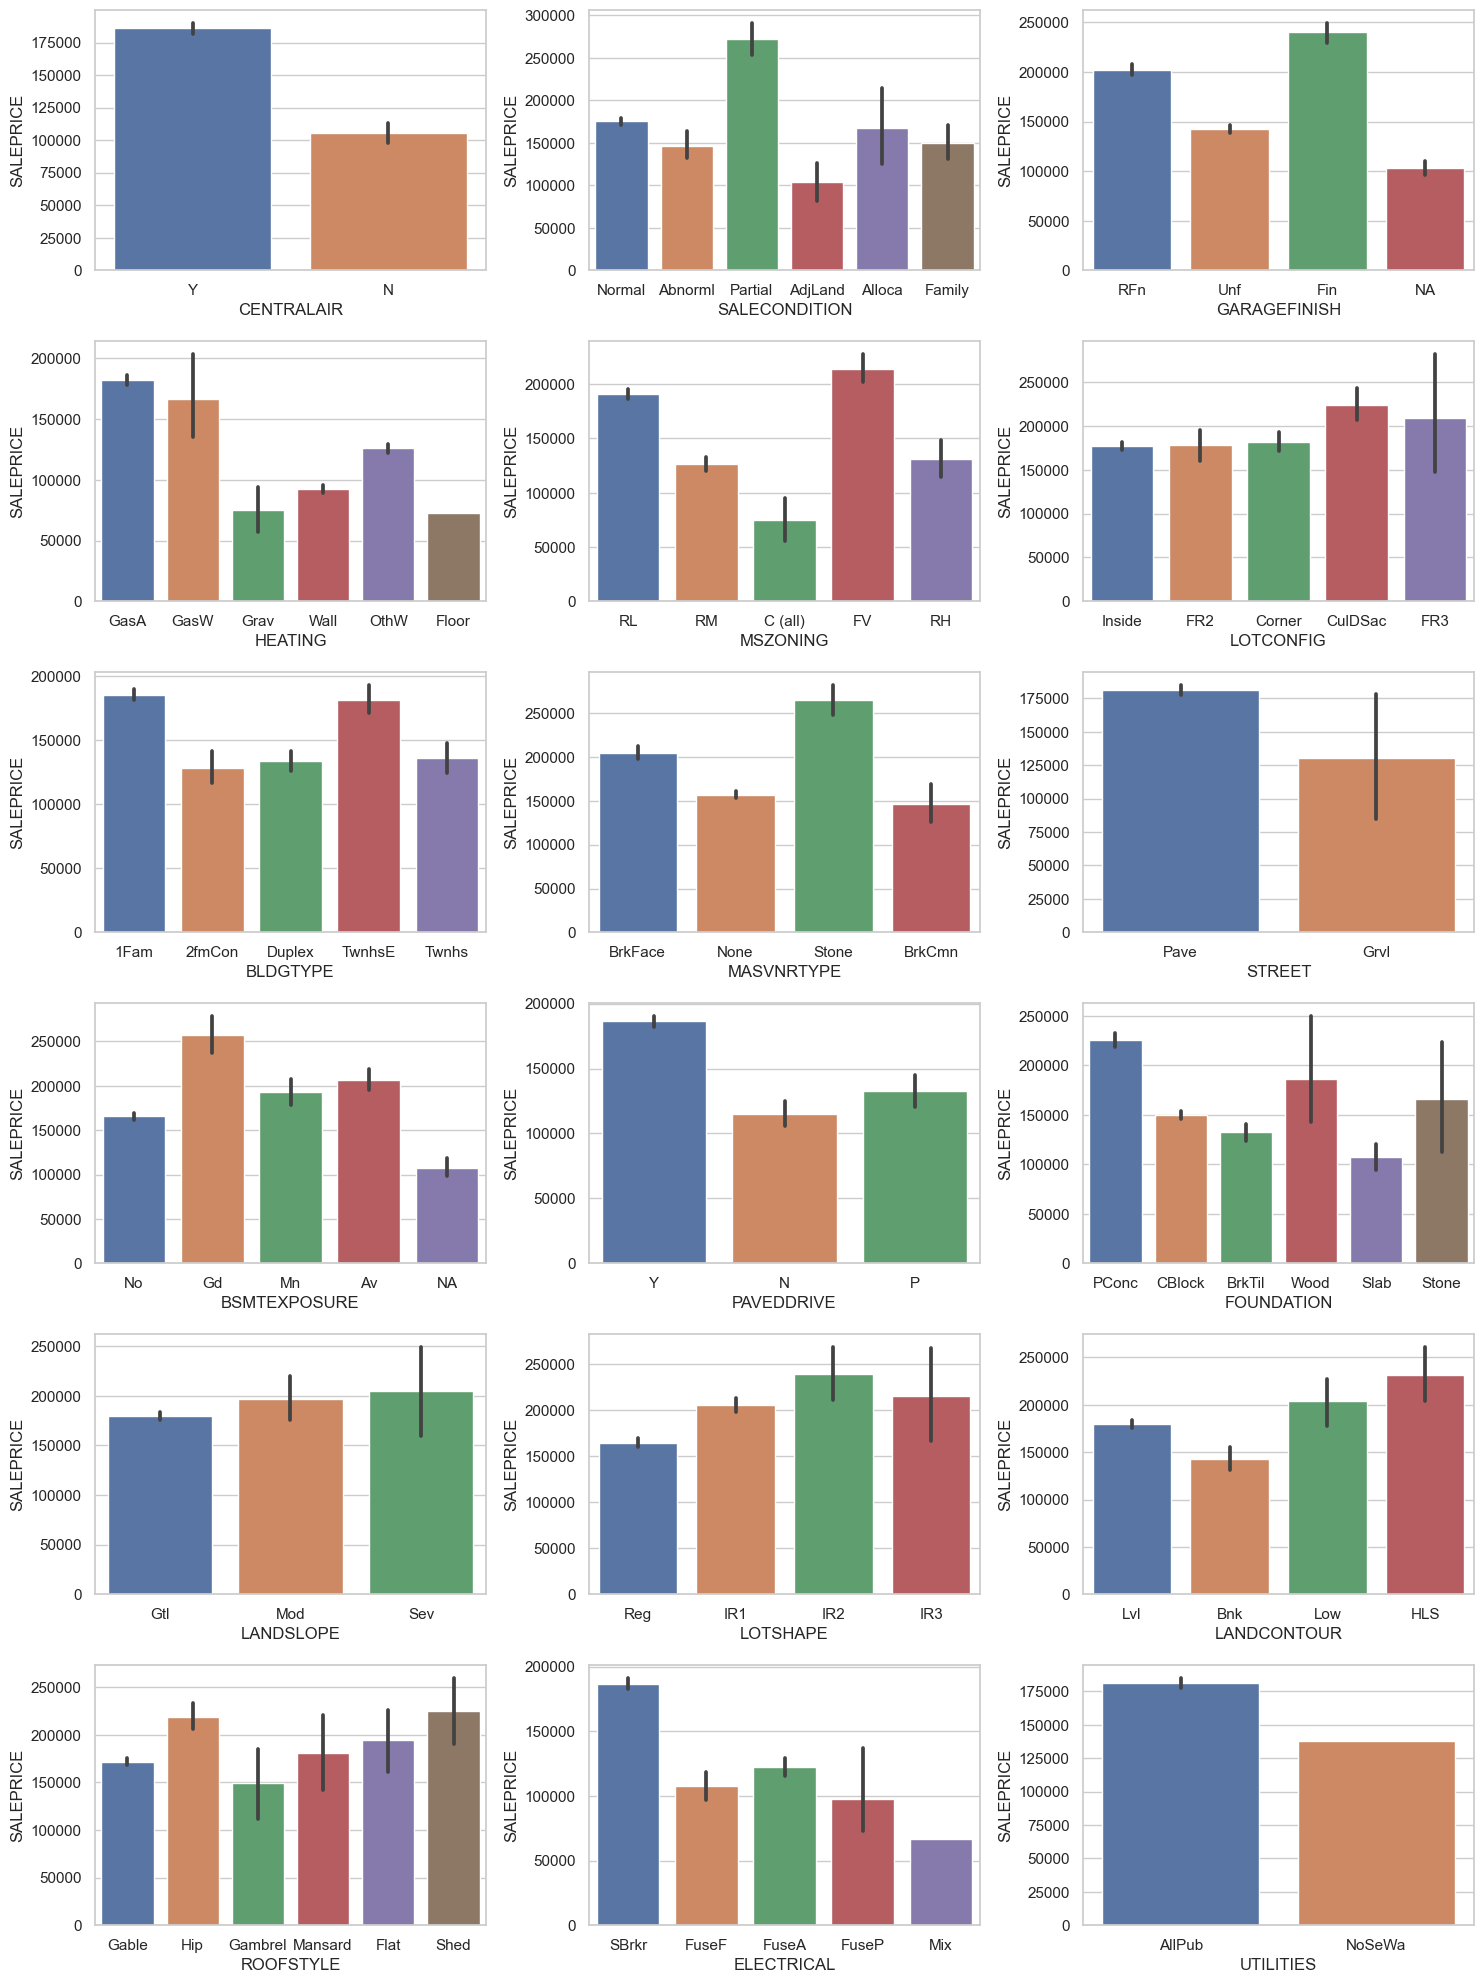

In [134]:
nom_cols_less_than_6 = []

for c in nom_columns:
    n_values = train[c].nunique()
    if n_values < 7:
        nom_cols_less_than_6.append(c)


ncols = 3
nrows = math.ceil(len(nom_cols_less_than_6) / ncols)
fig, ax = plt.subplots(nrows, ncols, figsize=(15, 20))

for r in range(0, nrows):
    for c in range(0, ncols):
        sns.barplot(x=nom_cols_less_than_6.pop(), y='SALEPRICE', data=train, ax=ax[r][c])
plt.tight_layout()
plt.show()


In [138]:
train.isin([0]).sum().sort_values(ascending=False).head(27)

POOLAREA         1453
3SSNPORCH        1436
LOWQUALFINSF     1434
MISCVAL          1408
BSMTHALFBATH     1378
SCREENPORCH      1344
BSMTFINSF2       1293
ENCLOSEDPORCH    1252
HALFBATH          913
BSMTFULLBATH      856
2NDFLRSF          829
WOODDECKSF        761
FIREPLACES        690
FIREPLACEQU       690
OPENPORCHSF       656
BSMTFINSF1        467
BSMTUNFSF         118
GARAGECOND         81
GARAGECARS         81
GARAGEAREA         81
GARAGEQUAL         81
TOTALBSMTSF        37
BSMTQUAL           37
BSMTCOND           37
FULLBATH            9
BEDROOMABVGR        6
KITCHENABVGR        1
dtype: int64

In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSUBCLASS     1460 non-null   int64 
 1   MSZONING       1460 non-null   object
 2   LOTAREA        1460 non-null   int64 
 3   STREET         1460 non-null   object
 4   LOTSHAPE       1460 non-null   object
 5   LANDCONTOUR    1460 non-null   object
 6   UTILITIES      1460 non-null   object
 7   LOTCONFIG      1460 non-null   object
 8   LANDSLOPE      1460 non-null   object
 9   NEIGHBORHOOD   1460 non-null   object
 10  CONDITION1     1460 non-null   object
 11  CONDITION2     1460 non-null   object
 12  BLDGTYPE       1460 non-null   object
 13  HOUSESTYLE     1460 non-null   object
 14  OVERALLQUAL    1460 non-null   int64 
 15  OVERALLCOND    1460 non-null   int64 
 16  YEARBUILT      1460 non-null   int64 
 17  YEARREMODADD   1460 non-null   int64 
 18  ROOFSTYLE      1460 non-null

In [142]:
numerical_cols = list(train.dtypes[train.dtypes == 'int64'].index)

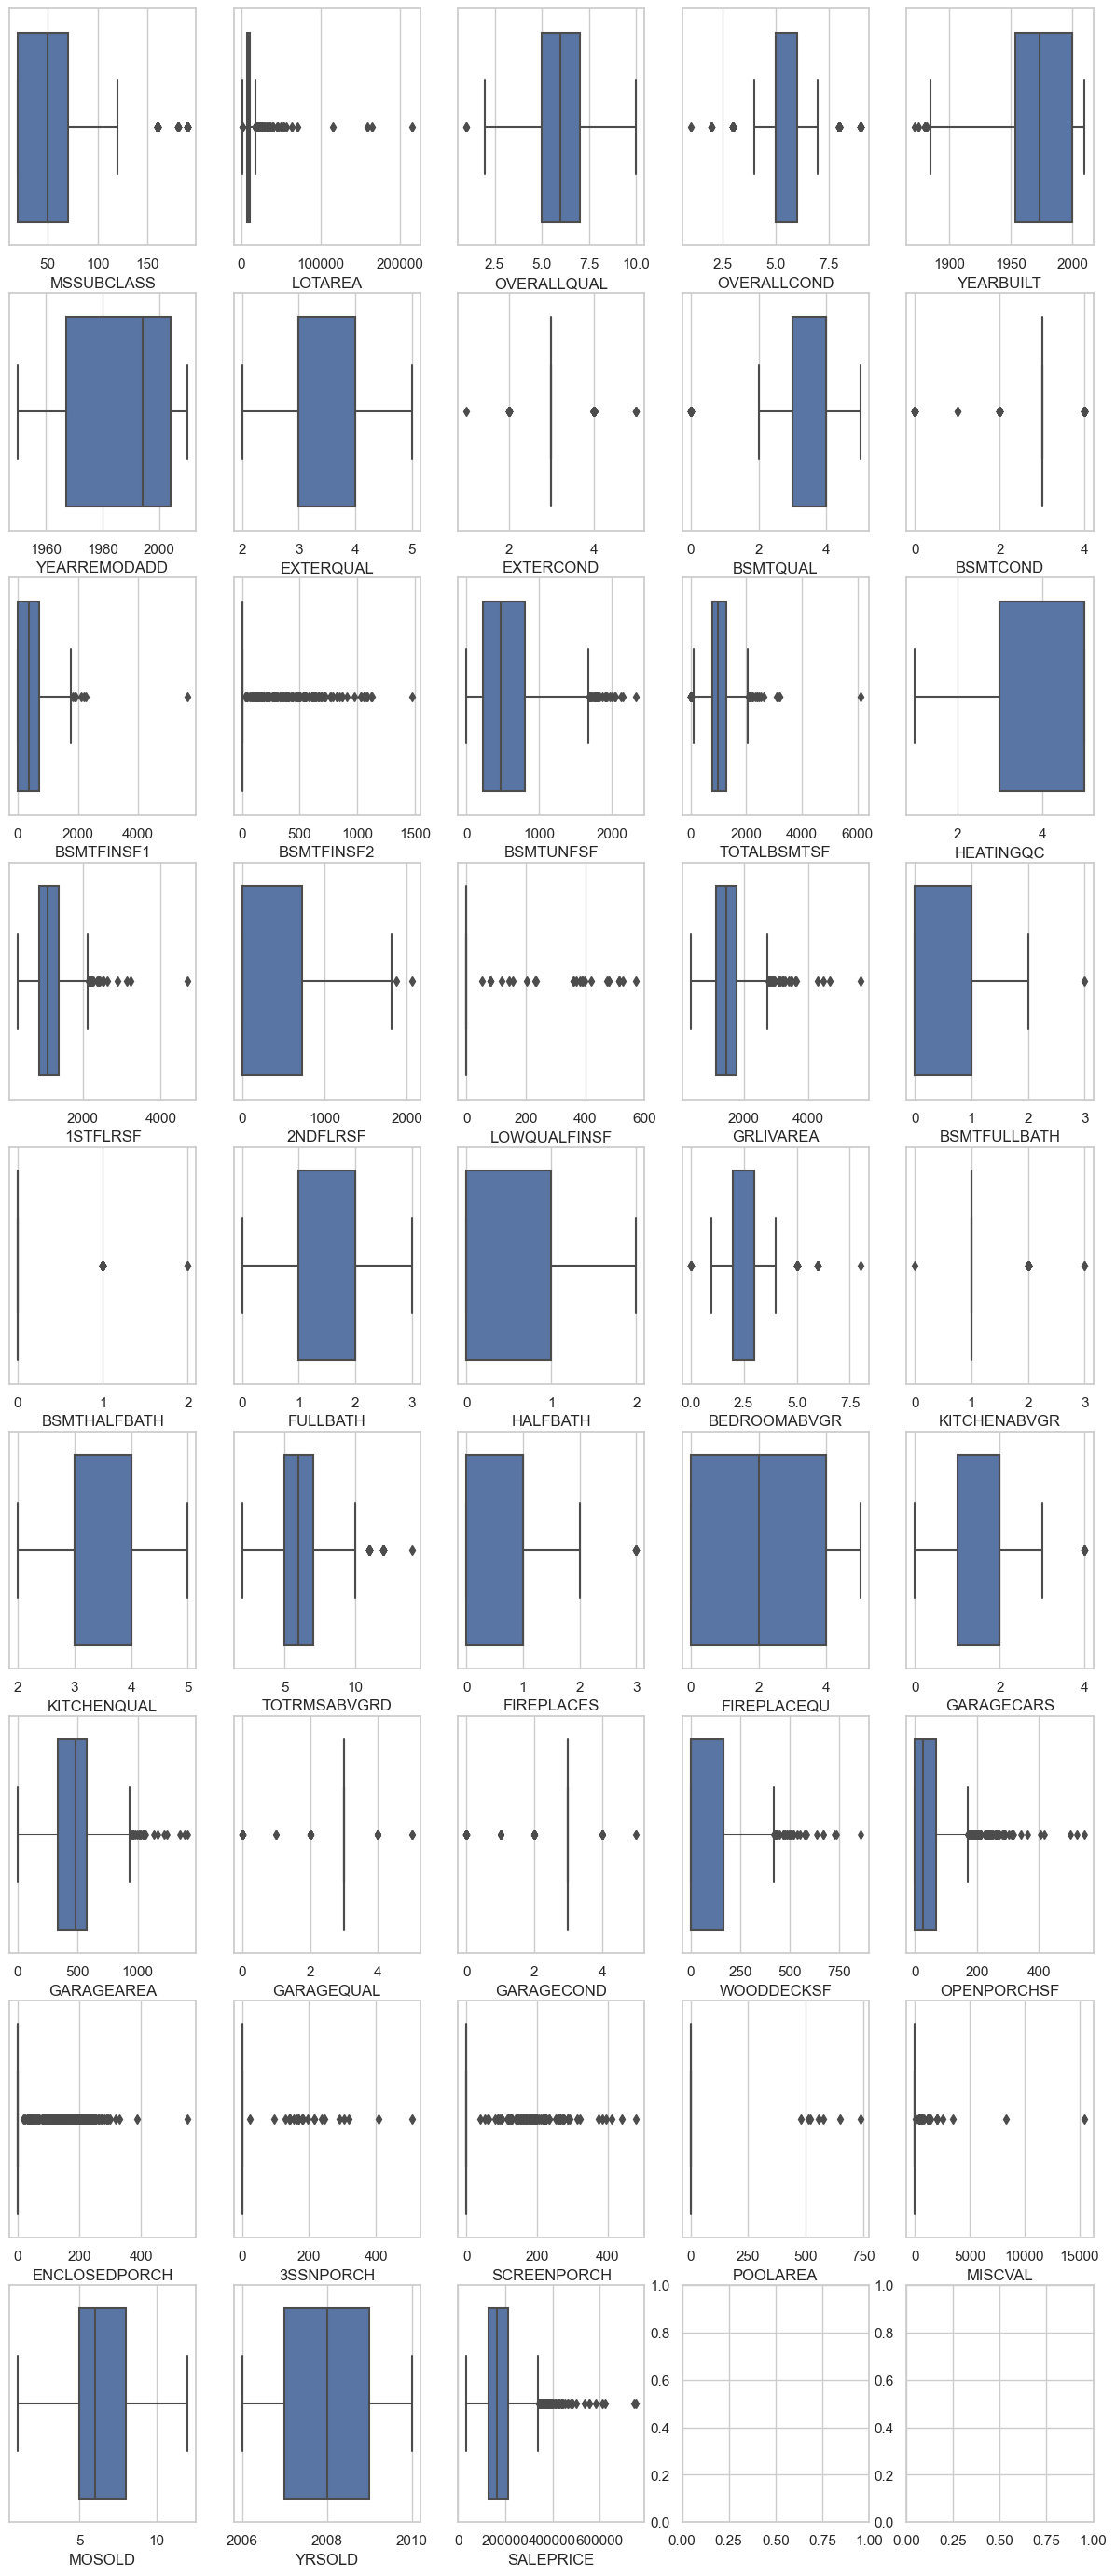

In [149]:
rows = 9
columns = 5

fig, ax = plt.subplots(rows, columns, figsize=(15, 35))

x, y = 0, 0

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=train[col], ax=ax[x, y])

    if y < columns-1:
        y += 1
    elif y == columns-1:
        x += 1
        y = 0
    # else:
    #     y += 1

In [151]:
train.to_csv('train_cleaned.csv')